In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [2]:
train = pd.read_csv('KDDTrain+.txt')
test = pd.read_csv('KDDTest+.txt')

In [3]:
train.head(8)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21


In [4]:
test.head(8)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21


In [5]:
train.tail()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [6]:
test.tail()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
22542,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [3]:
# ajout nom des column
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
train.columns=column_names
test.columns=column_names

In [4]:
print("Taille initial du dataset train :",train.shape)
print("Taille initial du dataset train :",test.shape)

Taille initial du dataset train : (125972, 43)
Taille initial du dataset train : (22543, 43)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [10]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
train.describe(include="object")

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


In [12]:
# affichage des valeurs pour chaque colonne
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne duration: [    0  5607   507 ...  5430 11680   679]
Valeurs uniques pour la colonne protocol_type: ['udp' 'tcp' 'icmp']
Valeurs uniques pour la colonne service: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Valeurs uniques pour la colonne flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Valeurs uniques pour la colonne src_bytes: [  146     0   232 ...  2816 11466  235

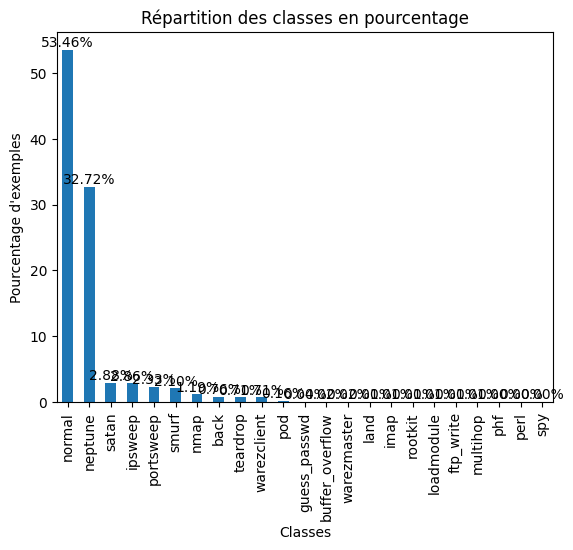

In [13]:
class_counts = train['attack'].value_counts()
class_percentages = (class_counts / len(train)) * 100
ax = class_percentages.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

In [14]:
train.duplicated().sum()

0

In [15]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

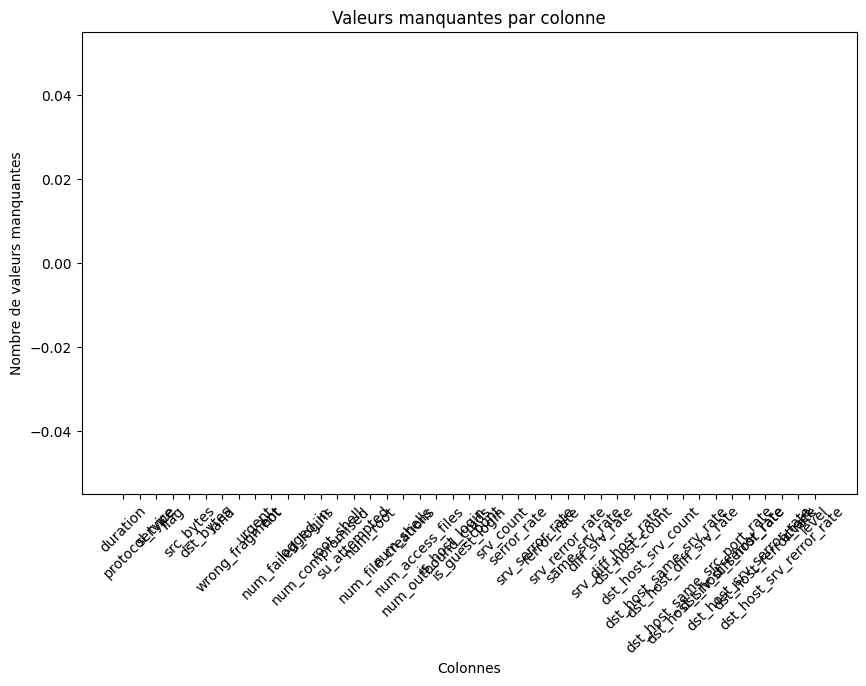

In [16]:
missing_mask = train.isnull()
missing_count = missing_mask.sum()
plt.figure(figsize=(10, 6))
plt.bar(missing_count.index, missing_count)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()


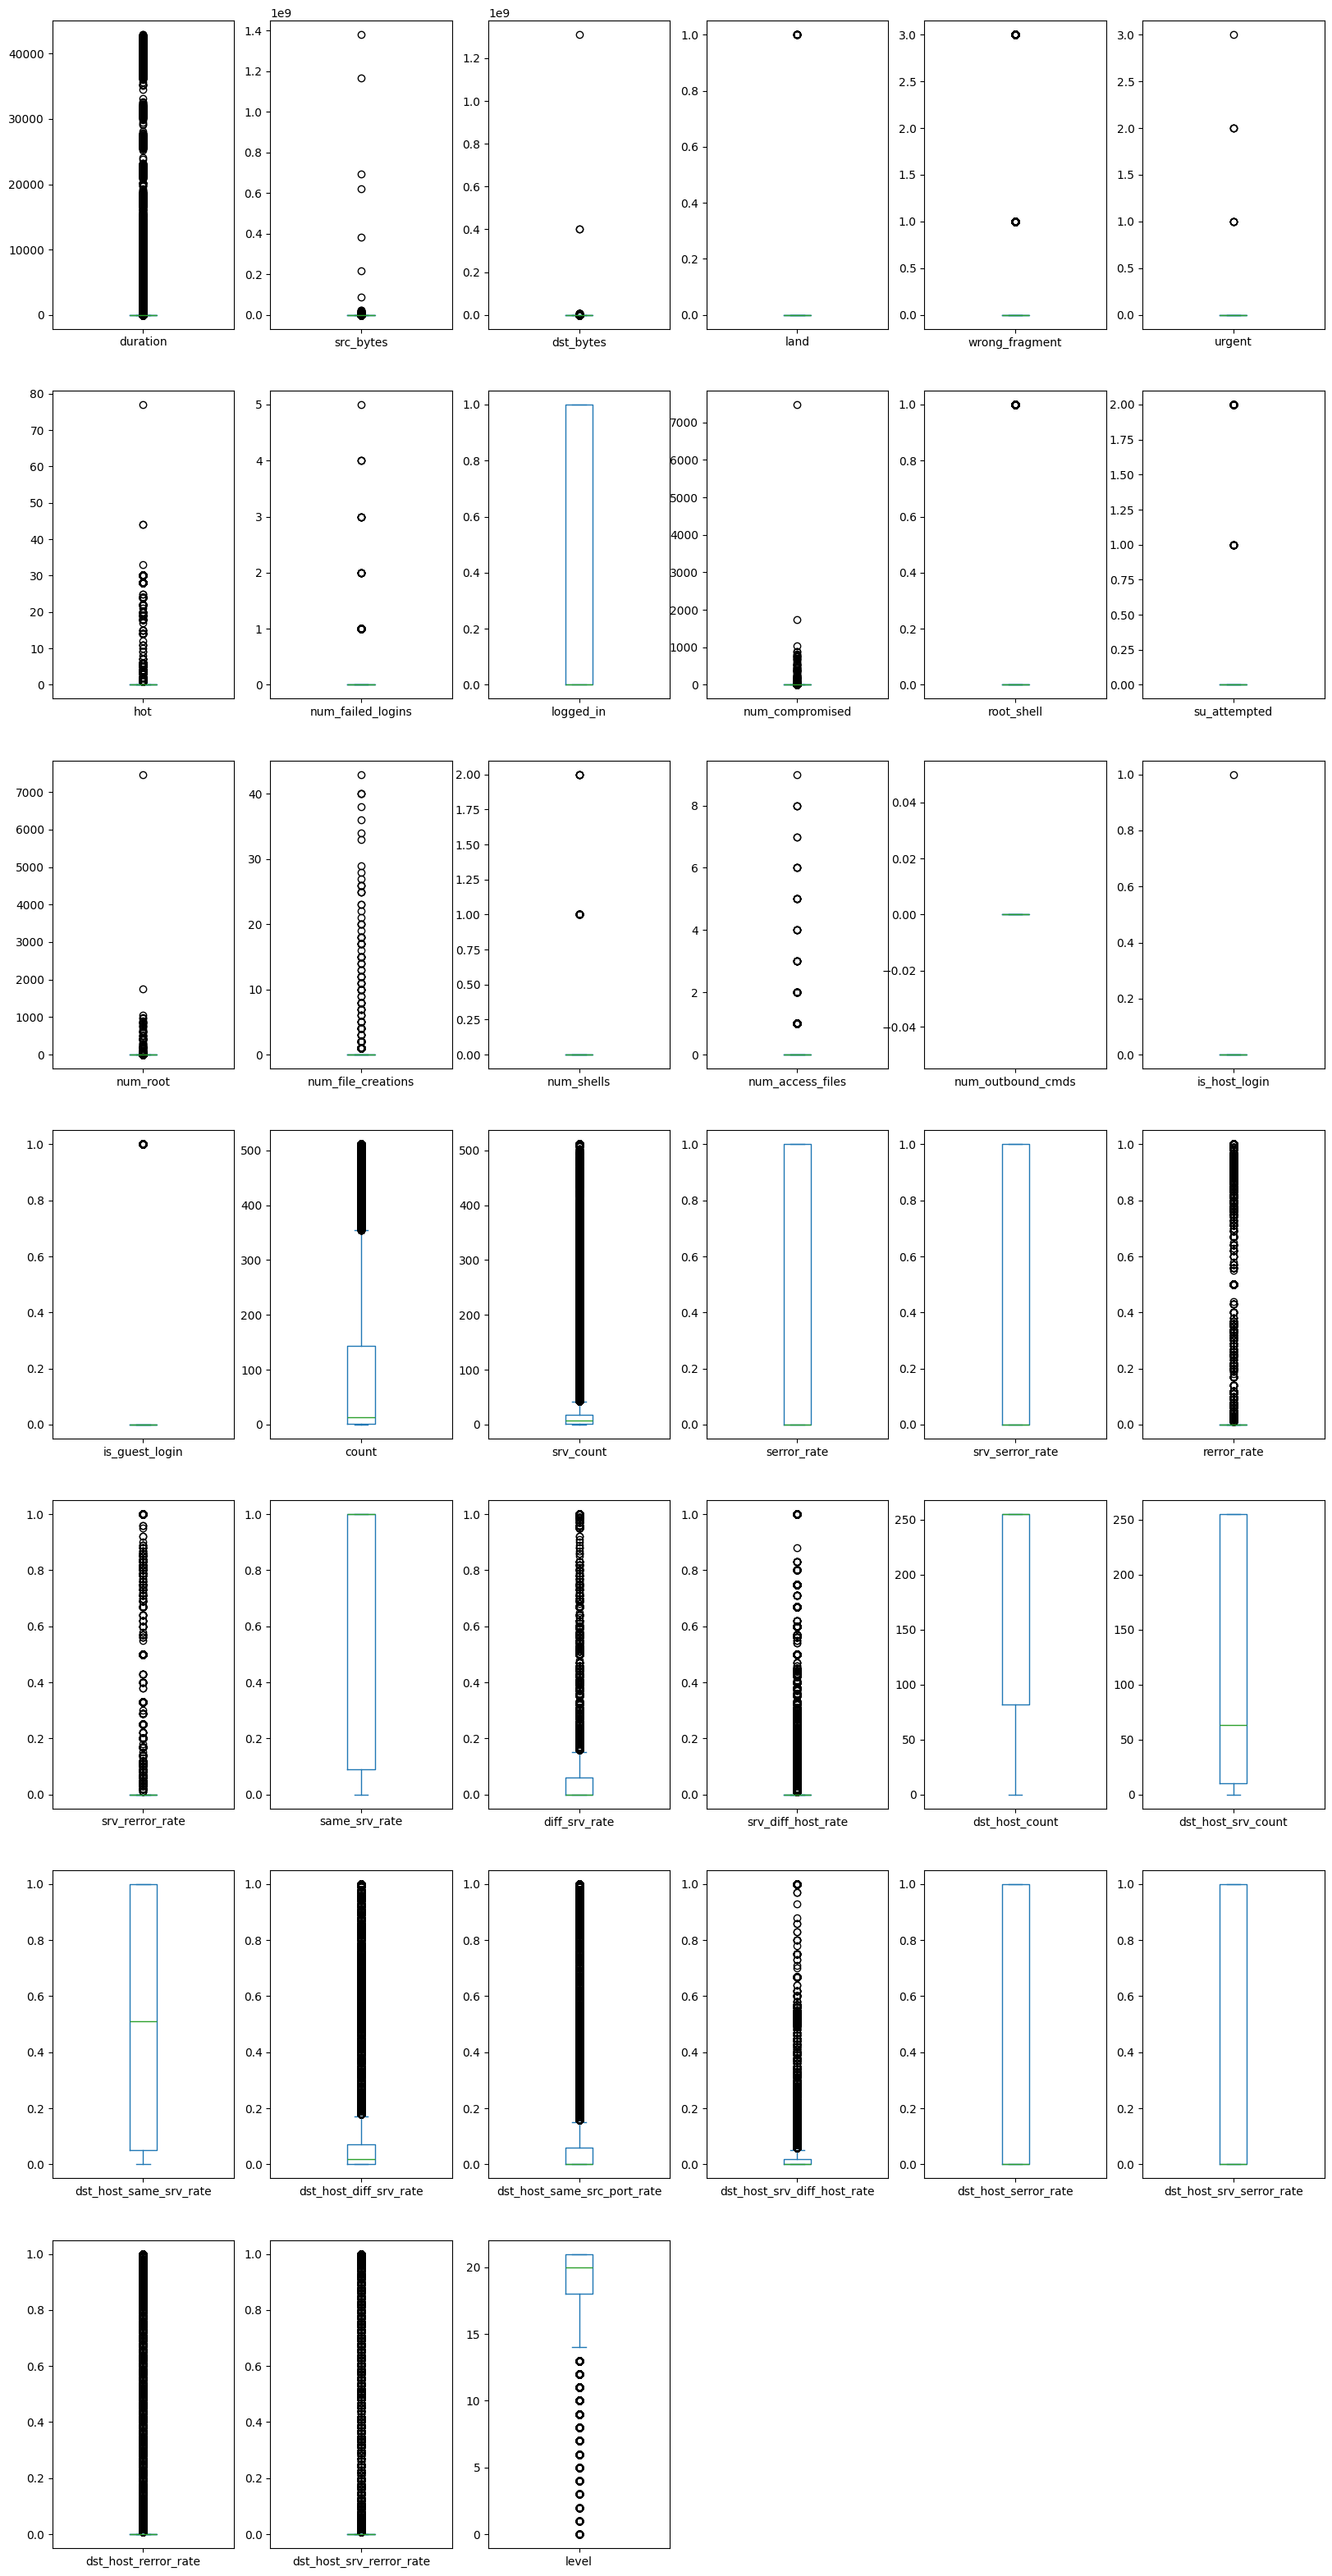

In [19]:
#Visualisation du trainset
train.plot(kind='box', subplots=True, layout=(7, 6), figsize=(20, 40))
plt.show()


In [22]:
def detect_outliers_iqr(data, threshold=1.5):
    outliers_info = {}

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            
            if not column_outliers.empty:
                num_outliers = len(column_outliers)
                percent_outliers = (num_outliers / len(data)) * 100
                outliers_info[column] = {"outliers_df": column_outliers, "num_outliers": num_outliers, "percent_outliers": percent_outliers}

    return outliers_info

outliers_info = detect_outliers_iqr(train)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_info.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")


Outliers in column 'duration': 10018 outliers (7.95%)
Outliers in column 'src_bytes': 13840 outliers (10.99%)
Outliers in column 'dst_bytes': 23579 outliers (18.72%)
Outliers in column 'hot': 2671 outliers (2.12%)
Outliers in column 'num_compromised': 1286 outliers (1.02%)
Outliers in column 'srv_count': 12054 outliers (9.57%)
Outliers in column 'rerror_rate': 16190 outliers (12.85%)
Outliers in column 'srv_rerror_rate': 16206 outliers (12.86%)
Outliers in column 'diff_srv_rate': 7788 outliers (6.18%)
Outliers in column 'srv_diff_host_rate': 28399 outliers (22.54%)
Outliers in column 'dst_host_diff_srv_rate': 10550 outliers (8.37%)
Outliers in column 'dst_host_same_src_port_rate': 25051 outliers (19.89%)
Outliers in column 'dst_host_srv_diff_host_rate': 11682 outliers (9.27%)
Outliers in column 'dst_host_rerror_rate': 22794 outliers (18.09%)
Outliers in column 'dst_host_srv_rerror_rate': 19357 outliers (15.37%)


In [21]:
#Remplacement des outliers
def replace_outliers_with_quantile(data, threshold=0.99):
    cleaned_data = data.copy()

    # Storage des outliers before and after
    outliers_count = {'Before': {}, 'After': {}}

    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            # Determiner la valeur du quantile
            quantile_value = data[column].quantile(threshold)

            # Compter les outliers avant replacement
            outlier_indices_before = data[column] > quantile_value
            outliers_count['Before'][column] = outlier_indices_before.sum()

            if outlier_indices_before.any():
                cleaned_data[column] = np.where(outlier_indices_before, quantile_value, cleaned_data[column])

            # Compter les outliers après replacement
            outlier_indices_after = cleaned_data[column] > quantile_value
            outliers_count['After'][column] = outlier_indices_after.sum()

    return cleaned_data, outliers_count

before_replacement = train.copy()

#Application de la fonction des outliers
train, outliers_count = replace_outliers_with_quantile(train)
test, outliers_count = replace_outliers_with_quantile(test)


#Affichage des outliers before and after
print("Outliers Count:")
print(pd.DataFrame(outliers_count))


Outliers Count:
                             Before  After
duration                        226      0
src_bytes                        11      0
dst_bytes                       226      0
land                              7      0
wrong_fragment                  100      0
urgent                           10      0
hot                              71      0
num_failed_logins                 5      0
logged_in                         0      0
num_compromised                  44      0
root_shell                       55      0
su_attempted                      4      0
num_root                         48      0
num_file_creations               42      0
num_shells                       19      0
num_access_files                 72      0
num_outbound_cmds                 0      0
is_host_login                    11      0
is_guest_login                    0      0
count                             0      0
srv_count                         0      0
serror_rate                       0   

In [5]:
def change_label(train):
  train.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  train.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  train.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  train.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(train)
change_label(test)

In [6]:
train['attack'].value_counts()
test['attack'].value_counts()


attack
normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: count, dtype: int64

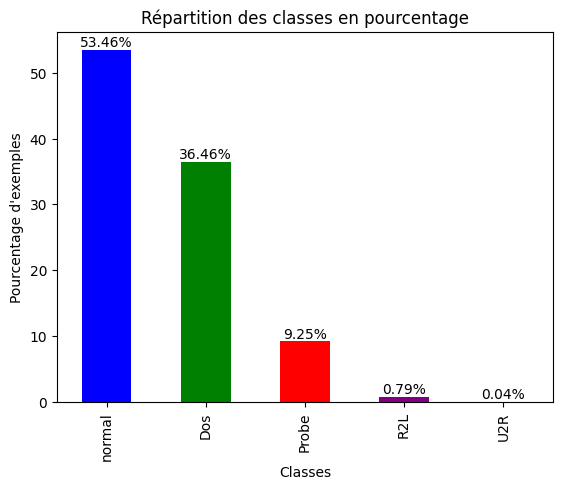

In [25]:
class_counts = train['attack'].value_counts()
class_percentages = (class_counts / len(train)) * 100
colors = ['blue',  'green', 'red', 'purple']
ax = class_percentages.plot(kind='bar', color=colors)
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

In [7]:
train = pd.get_dummies(train, columns=['protocol_type'], prefix='protocol')
train = pd.get_dummies(train, columns=['flag'], prefix='flag')
train = pd.get_dummies(train, columns=['service'], prefix='serv')
bool_columns = train.select_dtypes(include='bool').columns
train[bool_columns] = train[bool_columns].astype(int)


In [8]:
test = pd.get_dummies(test, columns=['protocol_type'], prefix='protocol')
test = pd.get_dummies(test, columns=['flag'], prefix='flag')
test = pd.get_dummies(test, columns=['service'], prefix='serv')
bool_columns = test.select_dtypes(include='bool').columns
test[bool_columns] = test[bool_columns].astype(int)


In [9]:
le = LabelEncoder()
train['attack']=le.fit_transform(train['attack'])
test['attack']=le.fit_transform(test['attack'])


In [31]:
train.head(50)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serv_telnet,serv_tftp_u,serv_tim_i,serv_time,serv_urh_i,serv_urp_i,serv_uucp,serv_uucp_path,serv_vmnet,serv_whois
0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train.shape

(125972, 124)

In [10]:
std_scaler = StandardScaler()
colonnes_a_normaliser = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'num_compromised', 'num_root',
    'num_file_creations', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count'
    ]
train[colonnes_a_normaliser] = std_scaler.fit_transform(train[colonnes_a_normaliser])
test[colonnes_a_normaliser] = std_scaler.fit_transform(test[colonnes_a_normaliser])


In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,1.923404e-17,1.000004,-0.138442,-0.138442,-0.138442,-0.138442,8.613176
src_bytes,125972.0,3.497099e-18,1.000004,-0.167729,-0.167729,-0.160560,-0.122762,8.718045
dst_bytes,125972.0,3.553503e-18,1.000004,-0.352793,-0.352793,-0.352793,-0.217157,6.355156
land,125972.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wrong_fragment,125972.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
serv_urp_i,125972.0,4.778840e-03,0.068964,0.000000,0.000000,0.000000,0.000000,1.000000
serv_uucp,125972.0,6.191852e-03,0.078445,0.000000,0.000000,0.000000,0.000000,1.000000
serv_uucp_path,125972.0,5.469469e-03,0.073754,0.000000,0.000000,0.000000,0.000000,1.000000
serv_vmnet,125972.0,4.897914e-03,0.069814,0.000000,0.000000,0.000000,0.000000,1.000000


In [11]:
X_train = train.drop('attack', axis=1)  # Features
Y_train= train['attack']  # Target variable
X_test = test.drop('attack', axis=1)  # Features
Y_test= test['attack']  # Target variable


C:\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


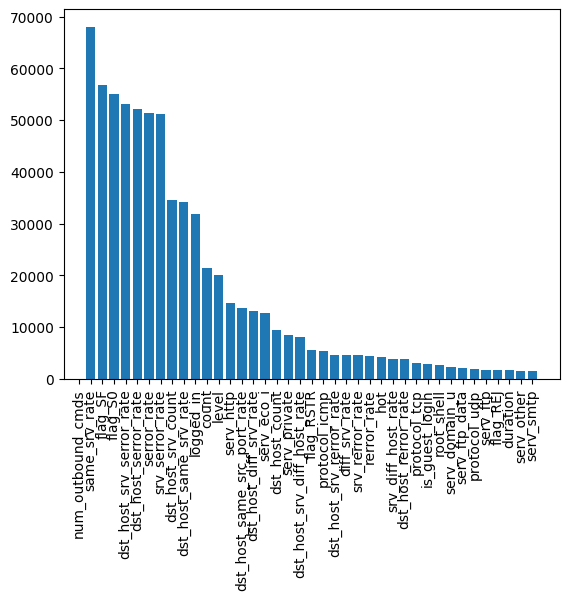

In [12]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=50)
X_train_selected = selector.fit_transform(X_train, Y_train)
selected_features = X_train.columns[selector.get_support()]
#print("Selected Features:", selected_features)
feature_scores = list(zip(selector.scores_, X_train.columns))
sorted_feature_scores = sorted(feature_scores, reverse=True)
num_list = []
col_list = []
for i in range(40):
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores[i])[1])


plt.bar(col_list, num_list)
plt.xticks(rotation=90)
plt.show()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [13]:
X_train_selected.shape
X_test_selected.shape

(22543, 61)

In [61]:
X_train_selected.head()

,duration,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,serv_nnsp,serv_other,serv_private,serv_smtp,serv_supdup,serv_telnet,serv_uucp,serv_uucp_path,serv_vmnet,serv_whois
0,-0.138442,-0.352793,-0.140748,0,-0.101557,-0.620987,-0.371789,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,-0.138442,-0.352793,-0.140748,0,-0.101557,0.339641,-0.301781,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,-0.138442,1.790312,-0.140748,1,-0.101557,-0.690851,-0.315783,0.2,0.2,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-0.138442,-0.242392,-0.140748,1,-0.101557,-0.472526,0.062262,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.138442,-0.352793,-0.140748,0,-0.101557,0.322176,-0.119760,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [14]:


# Créer une instance du classificateur k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=10 , p=1)  

# Entraîner le modèle sur les données d'entraînement
knn_classifier.fit(X_train_selected, Y_train)

# Prédire les étiquettes pour les données de test
y_pred = knn_classifier.predict(X_test_selected)

# Calculer la précision du modèle
accuracy = accuracy_score(Y_test, y_pred)
print(f" accuracy du modèle : {accuracy :.2f}")


 accuracy du modèle : 0.80


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Training avec Decision Tree en utilisant les hyperparamètres par défaut
dt_classifier = DecisionTreeClassifier(random_state=42,criterion ="gini")
dt_classifier.fit(X_train_selected, Y_train)
y_pred = dt_classifier.predict(X_test_selected)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7693297254136539


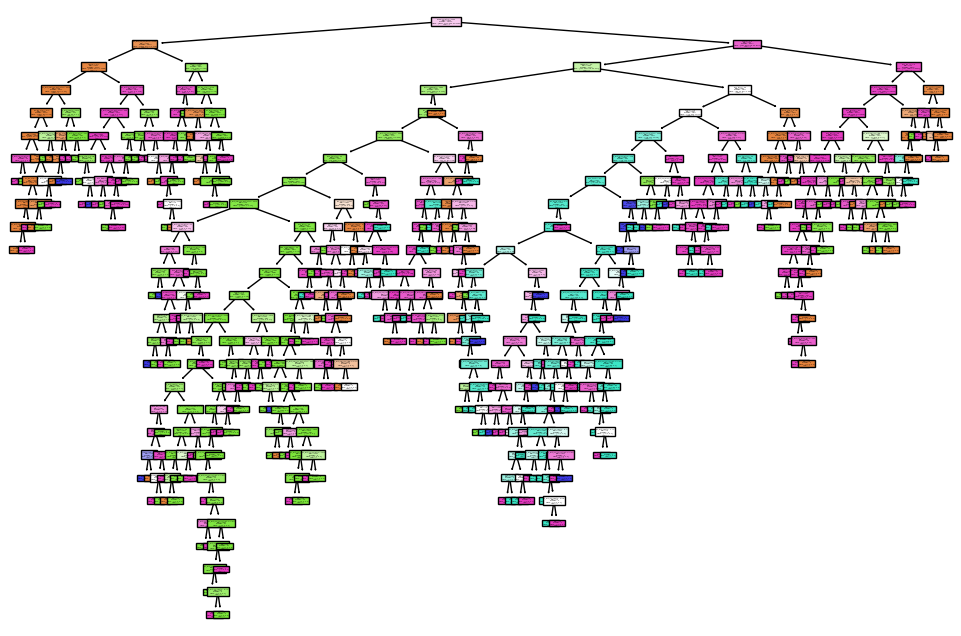

In [16]:
from sklearn import tree
#Affichage de l'arbre de décision graphique
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X_train_selected.columns, class_names=Y_train.unique().astype(str), filled=True)
plt.show()

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_selected, Y_train)


print("Meilleurs hyperparamètres:", grid_search.best_params_)


In [17]:
# Créer un modèle SVM
svm_model = SVC(kernel='poly')  # Vous pouvez ajuster le noyau selon vos besoins (par exemple, 'linear', 'rbf', 'poly', etc.)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train_selected, Y_train)

# Prédire les étiquettes pour les données de test
Y_pred = svm_model.predict(X_test_selected)

# Calculer la précision du modèle
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Précision du modèle SVM : {accuracy :.2f}")


Précision du modèle SVM : 0.80


In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_selected, Y_train)

y_pred_LGR = logreg.predict(X_test_selected)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import classification_report

class_report = classification_report(Y_test,y_pred_LGR,output_dict=True)
class_metrics = class_report['1']

accuracy = class_report['accuracy']
precision_LGR = class_metrics['precision']
recall_LGR = class_metrics['recall']
f1_score_LGR = class_metrics['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_LGR}")
print(f"Recall: {recall_LGR}")
print(f"F1-score: {f1_score_LGR}")

Accuracy: 0.7796655281018497
Precision: 0.7553035844915874
Recall: 0.8529533250722842
F1-score: 0.8011639185257031
